In [47]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
%matplotlib inline

In [48]:
#read data
df=pd.read_csv('StudentsPerformance.csv')

In [49]:
#remove restriction on number of rows viewed
pd.set_option('display.max_rows',None)
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


In [50]:
#dataset shape
df.shape

(1000, 8)

In [51]:
#column description
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [52]:
#test score summary stats
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [53]:
#maths is generally less well perfomed in comparison with other subjects.

In [54]:
#create column for average mark of each student
df['average score']=(df['math score']+df['reading score']+df['writing score'])/3

<AxesSubplot:title={'center':'Bar plot of gender proportions'}, xlabel='Gender', ylabel='Percentage'>

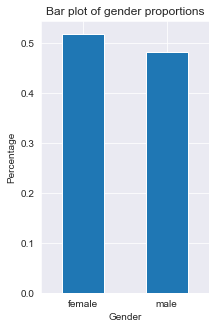

In [55]:
#proportions of gender and race
gender_prop=(df['gender'].value_counts())/len(df['gender'])
gender_prop.plot.bar(title='Bar plot of gender proportions', xlabel='Gender', ylabel='Percentage', rot=0, 
                    figsize=(3, 5))

Text(0, 0.5, 'Race/ethnicity')

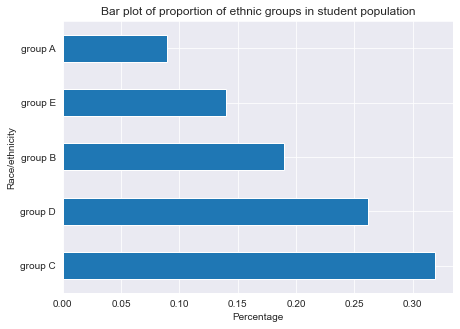

In [56]:
#distribution of ethnic groups
race_pct=(df['race/ethnicity'].value_counts())/len(df['race/ethnicity'])
race_pct.plot.barh(title='Bar plot of proportion of ethnic groups in student population', figsize=(7, 5))
plt.xlabel('Percentage')
plt.ylabel('Race/ethnicity')

Text(0, 0.5, 'Percentage of Parents')

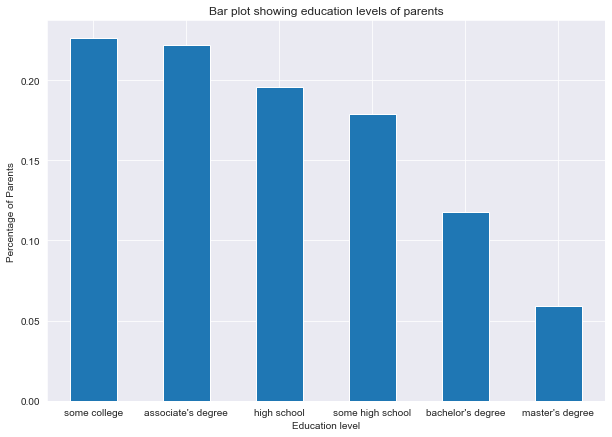

In [57]:
#Parental levels of education
parent_educ=(df['parental level of education'].value_counts())/len(df['parental level of education'])
parent_educ.plot.bar(title='Bar plot showing education levels of parents', figsize=(10, 7), rot=0)
plt.xlabel('Education level')
plt.ylabel('Percentage of Parents')

Text(0, 0.5, 'Percentage')

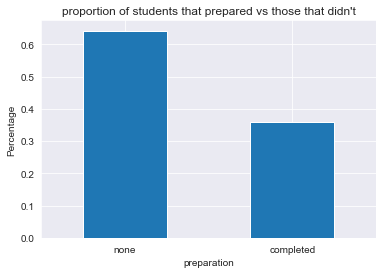

In [58]:
#proportion that prepared and those that didn't prepare for tests
prep=(df['test preparation course'].value_counts())/len(df['test preparation course'])
prep.plot(kind='bar', rot=0)
plt.title("proportion of students that prepared vs those that didn't")
plt.xlabel('preparation')
plt.ylabel('Percentage')

Text(0.5, 0, 'Percentage')

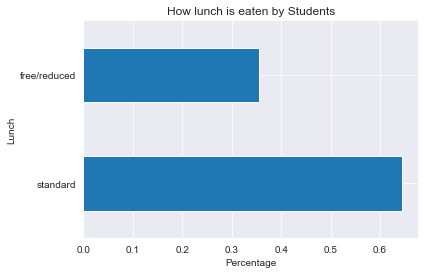

In [59]:
#How Lunch is eaten by students
prep=(df['lunch'].value_counts())/len(df['lunch'])
prep.plot(kind='barh')
plt.title("How lunch is eaten by Students")
plt.ylabel('Lunch')
plt.xlabel('Percentage')

In [60]:
#dicts mapping categorical variable values to numerical values.
test_prep_dict={'completed':1,'none':0}
gender_dict={'female':0, 'male':1}
parental_educ_dict={"bachelor's degree":4, 'some college':2, "master's degree":5,
       "associate's degree":3, 'high school':1, 'some high school':0}
lunch_dict={'free/reduced':0, 'standard':1}
ethnic_dict={'group B':1, 'group C':2, 'group A':0, 'group D':3, 'group E':4}

In [61]:
#replace all categorical variables with numeric
df.replace(test_prep_dict, inplace=True)
df.replace(gender_dict, inplace=True)
df.replace(parental_educ_dict, inplace=True)
df.replace(lunch_dict, inplace=True)
df.replace(ethnic_dict, inplace=True)

In [62]:
#how new dataframe looks like
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average score
0,0,1,4,1,0,72,72,74,72.666667
1,0,2,2,1,1,69,90,88,82.333333
2,0,1,5,1,0,90,95,93,92.666667
3,1,0,3,0,0,47,57,44,49.333333
4,1,2,2,1,0,76,78,75,76.333333


Text(33.99999999999999, 0.5, 'Features')

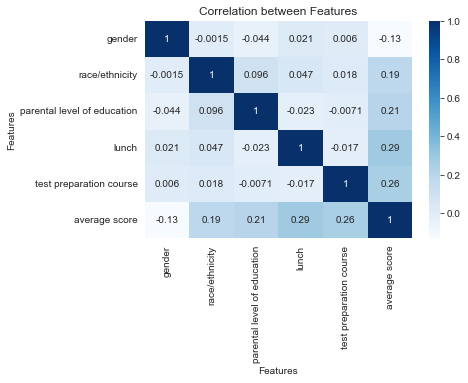

In [63]:
#correlation between features 
df_cat=df[['gender', 'race/ethnicity', 'parental level of education', 'lunch',
           'test preparation course', 'average score']]
corr_matrix=df_cat.corr()
sns.heatmap(corr_matrix, annot=True, cmap='Blues')
plt.title('Correlation between Features')
plt.xlabel('Features')
plt.ylabel('Features')

In [64]:
#Features with largest correlation with average
(corr_matrix.unstack())['average score'].sort_values(ascending=False)

average score                  1.000000
lunch                          0.290064
test preparation course        0.256710
parental level of education    0.205785
race/ethnicity                 0.185168
gender                        -0.130861
dtype: float64

In [65]:
#There is generally a low correlation between the average score and other features

Text(0.5, 1.0, 'regression plot of average score against lunch')

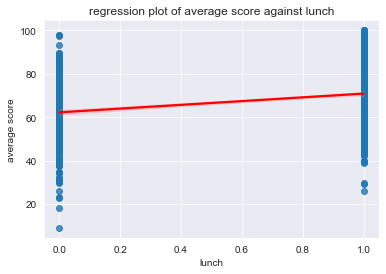

In [70]:
#regression plot of average score against lunch
sns.regplot(data=df_cat, y='average score', x='lunch', line_kws={'color':'red'})
plt.title('regression plot of average score against lunch')

In [66]:
#There is a positive correlation between lunch and average score
#It implies that students who eat a standard meal are more likely to perform better than those who eat reduced meal 

Text(0.5, 1.0, 'regression plot of average score against test preparation course')

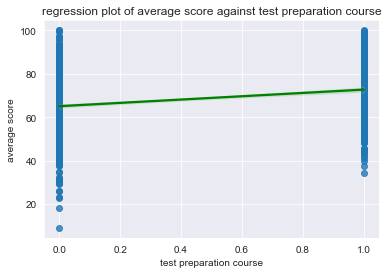

In [73]:
#regression plot of average score against test preparation course
sns.regplot(data=df_cat, y='average score', x='test preparation course', line_kws={'color':'green'})
plt.title('regression plot of average score against test preparation course')

In [67]:
#Positive correlation between test preparation course and average score
#Students who prepare for a test perform better than those who don't

Text(0.5, 1.0, 'regression plot of average score against parental level of education')

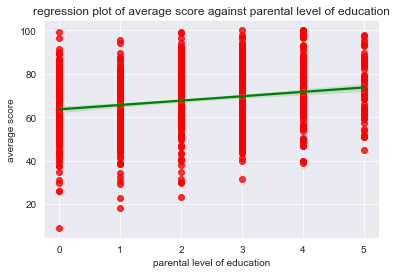

In [75]:
#regression plot of average score against parental level of education
sns.regplot(data=df_cat, y='average score', x='parental level of education', scatter_kws={'color':'red'}, line_kws={'color':'green'})
plt.title('regression plot of average score against parental level of education')

In [68]:
#Positive correlation between parental level of education and average score
#Students whose parents attained a high education level are more likely to perform better than those whose parents attained a lower level of education

Text(0.5, 1.0, 'regression plot of average score against gender')

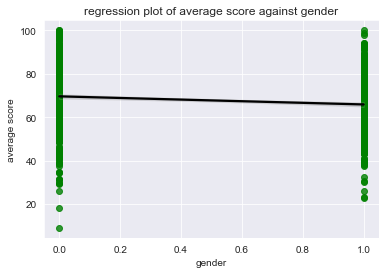

In [76]:
#regression plot of average score against gender
sns.regplot(data=df_cat, y='average score', x='gender', scatter_kws={'color':'green'}, line_kws={'color':'black'})
plt.title('regression plot of average score against gender')

In [69]:
#correlation between gender and average score is negative.
#Therefore female students tend to perform better than their male counterparts. 

Text(34.0, 0.5, 'Subjects')

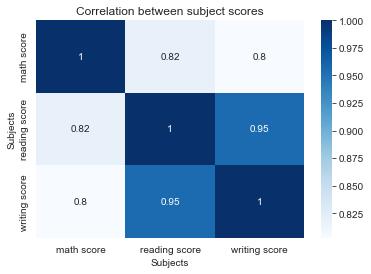

In [71]:
#correlation matrix of individual test scores
corr_matrix_2=df[['math score', 'reading score','writing score',]].corr()
sns.heatmap(corr_matrix_2, annot=True, cmap='Blues')
plt.title('Correlation between subject scores')
plt.xlabel('Subjects')
plt.ylabel('Subjects')

In [72]:
# Very High positive correlation between all subject scores.
#The correlation between reading and writing is exceptionally high.